In [15]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_excel('EDERJAKIN_LA_Datos_2021.xlsm', sheet_name=None)

In [4]:
for sheet_name in list(df.keys()):
   df[sheet_name].to_csv(sheet_name + 'Sheet.csv')

In [5]:
Usuarios = pd.read_csv('UsuariosSheet.csv')
Tutores_perfil = pd.read_csv('Tutores perfilSheet.csv')
Conocimientos = pd.read_csv('ConocimientosSheet.csv')
Cursos = pd.read_csv('CursosSheet.csv')
Programas = pd.read_csv('ProgramasSheet.csv')
Cursos_en_Programas = pd.read_csv('Cursos en ProgramasSheet.csv')
Itinearios = pd.read_csv('ItineariosSheet.csv')
Notas_Cursos = pd.read_csv('Notas_CursosSheet.csv')
Roles = pd.read_csv('RolesSheet.csv')
Plantas = pd.read_csv('PlantasSheet.csv')
Accesos = pd.read_csv('AccesosSheet.csv')
Acceso_1ero_ultimo = pd.read_csv('Acceso_1ero_ultimoSheet.csv')
Actividades = pd.read_csv('ActividadesSheet.csv')

In [6]:
Usuarios

,Unnamed: 0,user_id,useranonimo_name,active_flag,language,last_access,mdl_user_id,role_admin,role_manager,role_student,role_tutor,planta_name,Unnamed: 11
0,0,3,username_03,1,es,NaN,13.0,0,0,1,0,ABP Bergara,NaN
1,1,4,username_04,1,es,NaN,14.0,0,0,1,0,Fagorederlan,NaN
2,2,5,username_05,1,es,NaN,15.0,0,0,1,0,ABP Arrasate,NaN
3,3,6,username_06,1,es,NaN,17.0,0,0,1,0,Fagorederlan,NaN
4,4,7,username_07,1,es,NaN,18.0,0,0,1,0,ABP Arrasate,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,432,username_432,1,es,NaN,457.0,0,0,1,0,MT Aretxabaleta,NaN
416,416,433,username_433,1,es,NaN,458.0,0,0,1,0,MT Aretxabaleta,NaN
417,417,434,username_434,1,es,NaN,459.0,0,0,1,0,MT Aretxabaleta,NaN
418,418,435,username_435,1,es,NaN,460.0,0,0,1,0,MT Aretxabaleta,NaN


In [7]:
#Nombre de columnas
Usuarios.columns

Index(['Unnamed: 0', 'user_id', 'useranonimo_name', 'active_flag', 'language',
       'last_access', 'mdl_user_id', 'role_admin', 'role_manager',
       'role_student', 'role_tutor', 'planta_name', 'Unnamed: 11'],
      dtype='object')

In [8]:
#Numero de columnas/filas
Usuarios.shape

(420, 13)

In [9]:
Usuarios.info

<bound method DataFrame.info of      Unnamed: 0  user_id useranonimo_name  active_flag language  last_access  \
0             0        3      username_03            1       es          NaN   
1             1        4      username_04            1       es          NaN   
2             2        5      username_05            1       es          NaN   
3             3        6      username_06            1       es          NaN   
4             4        7      username_07            1       es          NaN   
..          ...      ...              ...          ...      ...          ...   
415         415      432     username_432            1       es          NaN   
416         416      433     username_433            1       es          NaN   
417         417      434     username_434            1       es          NaN   
418         418      435     username_435            1       es          NaN   
419         419      436     username_436            1       es          NaN   

     md

In [10]:
#Tipos de variables
Usuarios.dtypes

Unnamed: 0            int64
user_id               int64
useranonimo_name     object
active_flag           int64
language             object
last_access         float64
mdl_user_id         float64
role_admin            int64
role_manager          int64
role_student          int64
role_tutor            int64
planta_name          object
Unnamed: 11         float64
dtype: object

In [11]:
#Duplicados
Usuarios.duplicated().sum() # busca duplicados de fila completa

0

In [12]:
#NA'S
Usuarios.isna()
#Eliminamos last_acceses por %100 de NA'S 
Usuarios.isna().sum()


Unnamed: 0            0
user_id               0
useranonimo_name      0
active_flag           0
language              0
last_access         420
mdl_user_id          15
role_admin            0
role_manager          0
role_student          0
role_tutor            0
planta_name           0
Unnamed: 11         420
dtype: int64

In [12]:
#Se quitan o no 15 mdl_user_id en caso de que no necesitemos la variable
Usuarios=Usuarios.dropna(subset = ['mdl_user_id'])

In [13]:
Usuarios["mdl_user_id"] = Usuarios["mdl_user_id"].astype(int)

<ipython-input-13-ce90060094c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Usuarios["mdl_user_id"] = Usuarios["mdl_user_id"].astype(int)


In [ ]:
#Outliers

In [23]:
Usuarios.describe()

,Unnamed: 0,user_id,active_flag,last_access,mdl_user_id,role_admin,role_manager,role_student,role_tutor,Unnamed: 11
count,405.000000,405.000000,405.000000,0.0,405.000000,405.000000,405.000000,405.000000,405.000000,0.0
mean,208.271605,217.849383,0.851852,NaN,246.585185,0.004938,0.064198,0.886420,0.175309,NaN
std,123.332844,128.182669,0.355686,NaN,130.018433,0.070186,0.245408,0.317693,0.380701,NaN
min,0.000000,3.000000,0.000000,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,101.000000,105.000000,1.000000,NaN,133.000000,0.000000,0.000000,1.000000,0.000000,NaN
50%,203.000000,212.000000,1.000000,NaN,253.000000,0.000000,0.000000,1.000000,0.000000,NaN
75%,318.000000,333.000000,1.000000,NaN,359.000000,0.000000,0.000000,1.000000,0.000000,NaN
max,419.000000,436.000000,1.000000,NaN,461.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [ ]:
Tutores_perfil

In [ ]:
Tutores_perfil.columns

In [ ]:
Tutores_perfil=Tutores_perfil.drop(['Unnamed: 0'], axis=1)

In [ ]:
#Tipos de variables
Tutores_perfil.dtypes

In [ ]:
#Duplicados
Tutores_perfil.duplicated().sum() # busca duplicados de fila completa

In [ ]:
#NA'S
Tutores_perfil.isna()
#Eliminamos last_acceses por %100 de NA'S 
Tutores_perfil.isna().sum()

In [ ]:
Tutores_perfil.shape

In [ ]:
Tutores_perfil = Tutores_perfil.fillna("Tutores basicos")

In [25]:
Tutores_perfil

,Unnamed: 0,perfil_id,user_id,perfil_name
0,0,3,10,Gestor de empresa
1,1,3,41,Gestor de empresa
2,2,3,42,Gestor de empresa
3,3,3,110,Gestor de empresa
4,4,3,115,Gestor de empresa
...,...,...,...,...
183,183,0,358,NaN
184,184,0,369,NaN
185,185,0,379,NaN
186,186,0,415,NaN


In [ ]:
#Outliers

In [24]:
Tutores_perfil.describe()

,Unnamed: 0,perfil_id,user_id
count,188.000000,188.000000,188.000000
mean,93.500000,3.712766,209.079787
std,54.415071,3.140634,105.263250
min,0.000000,0.000000,3.000000
25%,46.750000,0.000000,137.750000
50%,93.500000,6.000000,196.000000
75%,140.250000,6.000000,305.250000
max,187.000000,8.000000,436.000000


In [ ]:
Conocimientos

In [ ]:
#Nombre de columnas
Conocimientos.columns

In [ ]:
Conocimientos=Conocimientos.drop(['Unnamed: 0'], axis=1)
Conocimientos=Conocimientos.drop(['color'], axis=1)


In [ ]:
#Tipos de variables
Conocimientos.dtypes

In [ ]:
#Duplicados
Conocimientos.duplicated().sum() # busca duplicados de fila completa

In [ ]:
#NA'S
Conocimientos.isna()
#Eliminamos last_acceses por %100 de NA'S 
Conocimientos.isna().sum()

In [ ]:
Conocimientos.shape

In [ ]:
Conocimientos=Conocimientos.drop(['description'], axis=1)
Conocimientos=Conocimientos.drop(['referencia'], axis=1)


In [ ]:
Conocimientos = Conocimientos.fillna("Sin asignar")


In [ ]:
#Outliers

In [26]:
Conocimientos.describe()

,Unnamed: 0,conocimiento_id,created_by,categoria_conocimiento_id
count,155.000000,155.000000,155.000000,155.000000
mean,77.000000,87.664516,152.432258,44.141935
std,44.888751,49.260278,57.356939,56.412838
min,0.000000,1.000000,26.000000,0.000000
25%,38.500000,42.500000,135.000000,1.000000
50%,77.000000,91.000000,135.000000,11.000000
75%,115.500000,129.500000,151.000000,79.000000
max,154.000000,168.000000,292.000000,158.000000


In [37]:
Cursos


,Unnamed: 0,course_id,course_name,category,hours,course_shortname,sortorder,summary
0,0,1,EDERJakin FagorEDERLAN,0,0,EDERJAKIN,1,NaN
1,1,2,ITINERARIO GRADO DUAL 2018/19,3,0,ITI_GRADO_DUAL_18/19,40016,Itinerario de Aprendizaje del GRADO DUAL en Fa...
2,2,6,ITINERARIO CICLO DUAL 2018/19,3,0,ITI_CICLO_DUAL_18/19,40014,Itinerario de Aprendizaje del CICLO DUAL en Fa...
3,3,9,TEC_01 - PRODUCTOS FAGOR EDERLAN,3,4,TEC_01,40022,Conocer los PRODUCTOS fabricados de Fagor EDERLAN
4,4,10,TEC_02 - PROCESOS PRODUCTIVOS,3,20,TEC_02,40024,Conocer los PROCESOS PRODUCTIVOS de Fagor EDERLAN
...,...,...,...,...,...,...,...,...
134,134,303,CONTROL VISUAL MEC - MLA IKUS KONTROLA,27,0,TEC_CVMEC_02_MLA,110003,NaN
135,135,304,CONTROL VISUAL MEC - BR IKUS KONTROLA,27,0,TEC_CVMEC_02_BR,110002,NaN
136,136,305,CONTROL VISUAL MEC - UKL,27,0,TEC_CVMEC_01_UKL,110001,NaN
137,137,306,CURSO UXUE,27,0,TEC_ABP_UXUE,0,NaN


In [ ]:
#Nombre de columnas
Cursos.columns

In [ ]:
Cursos=Cursos.drop("course_shortname",axis=1)
Cursos=Cursos.drop("Unnamed: 0",axis=1)

In [ ]:
#Tipos de variables
Cursos.dtypes

In [ ]:
#Duplicados
Cursos.duplicated().sum() # busca duplicados de fila completa

In [ ]:
Cursos.shape

In [ ]:
#NA'S
Cursos.isna()
#Eliminamos last_acceses por %100 de NA'S 
Cursos.isna().sum()

In [ ]:
Cursos = Cursos.fillna("No especificado")

In [ ]:
#Outliers

In [21]:
Cursos.hours.describe()

count    139.000000
mean      12.086331
std       84.481151
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      800.000000
Name: hours, dtype: float64

<AxesSubplot:>

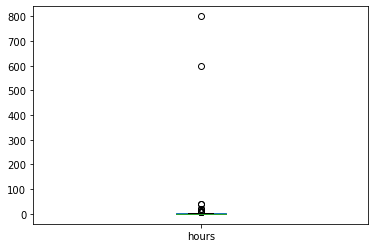

In [22]:
Cursos.hours.plot(kind ="box")

<AxesSubplot:ylabel='Frequency'>

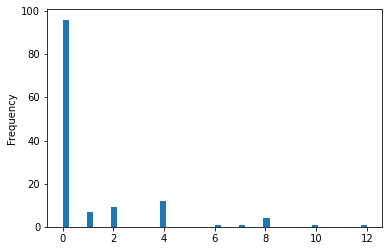

In [39]:
Cursos.hours.plot(kind ="hist", bins = 50)

In [38]:
Cursos=Cursos[Cursos.hours<13]

In [ ]:
Programas

In [ ]:
#Nombre de columnas
Programas.columns

In [ ]:
#Numero de columnas/filas
Programas.shape

In [ ]:
Programas.info

In [ ]:
#Tipos de variables
Programas.dtypes

In [ ]:
#Duplicados
Programas.duplicated().sum() # busca duplicados de fila completa

In [ ]:
#NA'S
Programas.isna()
Programas.isna().sum()

In [ ]:
#Eliminamos la fila que contiene NA en program_category_id.
Programas=Programas.dropna(axis = 0, how = 'any') 
Programas.isna().sum()

In [ ]:
#Eliminamos la columna 'Unnamed: 0' ya que no aporta valor.
Programas=Programas.drop(['Unnamed: 0'], axis=1)

In [ ]:
Programas

In [ ]:
#Outliers

In [27]:
Programas.describe()

,Unnamed: 0,program_id
count,110.000000,110.000000
mean,54.500000,132.063636
std,31.898276,34.482618
min,0.000000,60.000000
25%,27.250000,106.250000
50%,54.500000,133.500000
75%,81.750000,160.750000
max,109.000000,188.000000


In [ ]:
Cursos_en_Programas

In [ ]:
#Nombre de columnas
Cursos_en_Programas.columns

In [ ]:
#Numero de columnas/filas
Cursos_en_Programas.shape

In [ ]:
Cursos_en_Programas.info

In [ ]:
Cursos_en_Programas.dtypes

In [ ]:
#Duplicados
Cursos_en_Programas.duplicated().sum() # busca duplicados de fila completa

In [ ]:
#NA'S
Cursos_en_Programas.isna()
Cursos_en_Programas.isna().sum()

In [ ]:
#Eliminamos la columna 'Unnamed: 0' ya que no aporta valor.
Cursos_en_Programas=Cursos_en_Programas.drop(['Unnamed: 0'], axis=1)

In [ ]:
Cursos_en_Programas

In [ ]:
#Outliers

In [28]:
Cursos_en_Programas.describe()

,Unnamed: 0,program_course_online_id,course_moodle_id,conocimiento_id,num_periodo,program_id
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,126.000000,4867.679842,133.142292,57.905138,1.047431,136.343874
std,73.179004,908.578453,86.093270,48.011892,0.658976,38.722819
min,0.000000,1866.000000,10.000000,2.000000,0.000000,60.000000
25%,63.000000,4259.000000,69.000000,20.000000,1.000000,116.000000
50%,126.000000,5147.000000,86.000000,29.000000,1.000000,142.000000
75%,189.000000,5638.000000,218.000000,100.000000,1.000000,167.000000
max,252.000000,5730.000000,306.000000,168.000000,3.000000,188.000000


In [ ]:
Itinearios

In [ ]:
#Nombre de columnas
Itinearios.columns

In [ ]:
#Numero de columnas/filas
Itinearios.shape

In [40]:
Itinearios.info

<bound method DataFrame.info of      Unnamed: 0  active_flag  category_id                date_enroll  \
0             0            0            8  2020-05-04T00:00:00+01:00   
1             1            1            2  2021-07-22T00:00:00+01:00   
2             2            1            8  2021-09-08T00:00:00+01:00   
3             3            0            2  2020-06-18T00:00:00+01:00   
4             4            0            2  2020-09-24T00:00:00+01:00   
..          ...          ...          ...                        ...   
462         462            1            5  2021-10-25T00:00:00+01:00   
463         463            1            5  2021-10-25T00:00:00+01:00   
464         464            1            5  2021-10-25T00:00:00+01:00   
465         465            1            8  2021-10-28T00:00:00+01:00   
466         466            1            8  2021-10-28T00:00:00+01:00   

                    enroll_end  program_id remarks  tutor_academico_id  \
0    2023-04-01T23:59:00+01:0

In [ ]:
#Tipos de variables
Itinearios.dtypes

In [ ]:
#Corregimos fecha y hora de date_enroll y enroll_end
Itinearios['date_enroll']= pd.to_datetime(Itinearios['date_enroll'],utc=True)
Itinearios['enroll_end']= pd.to_datetime(Itinearios['enroll_end'],utc=True)
Itinearios

In [ ]:
#Tipos de variables corregido fecha y hora
Itinearios.dtypes

In [ ]:
#Duplicados
Itinearios.duplicated().sum() # busca duplicados de fila completa

In [ ]:
#NA'S
Itinearios.isna()
Itinearios.isna().sum()

In [ ]:
#Eliminamos la columna 'Unnamed: 0' ya que no aporta valor.
#Eliminamos la columna 'remarcks' ya que casi tiene un 100% de NA
#Eliminamos de momento la variable 'enroll_end' ya que tiene mas de un 60% de NA.
Itinearios=Itinearios.drop(['Unnamed: 0'], axis=1)
Itinearios=Itinearios.drop(['remarks'], axis=1)
Itinearios=Itinearios.drop(['enroll_end'], axis=1)

In [ ]:
Itinearios

In [ ]:
Notas_Cursos

In [ ]:
Notas_Cursos.columns

In [ ]:
Notas_Cursos.shape

In [ ]:
Notas_Cursos.info

In [ ]:
Notas_Cursos.dtypes

In [ ]:
#Duplicados
Notas_Cursos.duplicated().sum() #busca duplicados de fila completa

In [ ]:
#NA'S
Notas_Cursos.isna()
Notas_Cursos.isna().sum()

In [ ]:
#Duplicados
Notas_Cursos.duplicated(subset = ['grade', 'online_progress']).sum()

In [ ]:
#Eliminamos la columna 'Unnamed: 0' ya que no aporta valor.
Notas_Cursos=Notas_Cursos.drop(['Unnamed: 0'], axis=1)

In [ ]:
Notas_Cursos = Notas_Cursos.fillna(-999)

In [ ]:
Notas_Cursos

In [ ]:
Roles

In [ ]:
Roles.columns

In [ ]:
Roles.shape

In [ ]:
Roles.info

In [ ]:
#Tipo de variables
Roles.dtypes

In [ ]:
#Duplicados
Roles.duplicated().sum() #busca duplicados de fila completa

In [ ]:
#NA'S
Roles.isna()
Roles.isna().sum()

In [ ]:
#Eliminamos la columna 'Unnamed: 0' ya que no aporta valor.
Roles=Roles.drop(['Unnamed: 0'], axis=1)

In [ ]:
Roles

In [ ]:
Plantas

In [ ]:
Plantas=Plantas.drop(['Unnamed: 0'], axis=1)

In [ ]:
Plantas.dtypes

In [ ]:
#Duplicados
Plantas.duplicated().sum() # busca duplicados de fila completa

In [ ]:
#NA'S
Plantas.isna().sum()

In [ ]:
Plantas

In [ ]:
Accesos

In [ ]:
Accesos=Accesos.drop(['Unnamed: 0'], axis=1)

In [ ]:
Accesos.dtypes

In [ ]:
Accesos['timestamp']= pd.to_datetime(Accesos['timestamp'],utc=True)

In [ ]:
Accesos

In [ ]:
Accesos.dtypes

In [ ]:
#Duplicados
Accesos.duplicated().sum() # busca duplicados de fila completa

In [ ]:
Accesos=Accesos.drop_duplicates()

In [ ]:
Accesos.duplicated().sum()

In [ ]:
Accesos.isna().sum()

In [ ]:
Acceso_1ero_ultimo

In [ ]:
Acceso_1ero_ultimo.dtypes

In [ ]:
Acceso_1ero_ultimo=Acceso_1ero_ultimo.drop(['Unnamed: 0'], axis=1)

In [ ]:
#Duplicados
Acceso_1ero_ultimo.duplicated().sum() # busca duplicados de fila completa

In [ ]:
Acceso_1ero_ultimo['1er acceso'][Acceso_1ero_ultimo['1er acceso']=="--"]=None
Acceso_1ero_ultimo['ultimo acceso'][Acceso_1ero_ultimo['ultimo acceso']=="--"]=None

In [ ]:
Acceso_1ero_ultimo

In [ ]:
Acceso_1ero_ultimo.isna().sum()

In [ ]:
Acceso_1ero_ultimo.duplicated(subset = ['1er acceso', 'ultimo acceso']).sum()

In [ ]:
Acceso_1ero_ultimo[Acceso_1ero_ultimo.duplicated(subset = ['1er acceso', 'ultimo acceso'])].fillna('NUNCA')

In [ ]:
Acceso_1ero_ultimo[Acceso_1ero_ultimo.duplicated(subset = ['1er acceso', 'ultimo acceso'])]=Acceso_1ero_ultimo[Acceso_1ero_ultimo.duplicated(subset = ['1er acceso', 'ultimo acceso'])].fillna('NUNCA')

In [ ]:
Acceso_1ero_ultimo.isna().sum()

In [ ]:
Acceso_1ero_ultimo[Acceso_1ero_ultimo['1er acceso'].isna()]

In [ ]:
Acceso_1ero_ultimo[Acceso_1ero_ultimo['1er acceso'].isna()]='NUNCA'

In [ ]:
Acceso_1ero_ultimo.isna().sum()

In [ ]:
Acceso_1ero_ultimo

In [14]:
Actividades

,Unnamed: 0,mdl_user_id,course_name,course_id,category,actividad_name,grade,time
0,0,190,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,224,TÉCNICOS/TECNOLÓGICOS ABP,TEST FINAL,NaN,NaN
1,1,190,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,224,TÉCNICOS/TECNOLÓGICOS ABP,A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total,NaN,NaN
2,2,296,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,224,TÉCNICOS/TECNOLÓGICOS ABP,A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total,9.32,2020-12-18 15:25:05
3,3,296,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,224,TÉCNICOS/TECNOLÓGICOS ABP,TEST FINAL,9.32,2020-12-18 15:25:05
4,4,299,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,224,TÉCNICOS/TECNOLÓGICOS ABP,TEST FINAL,9.66,2020-12-18 16:45:34
...,...,...,...,...,...,...,...,...
3459,3459,21,Trazabilidad LPPFe MEC,278,Técnico / Tecnológico LPPFE,TEST - Enbalajearen etiketa / Etiquetado de em...,9.29,2021-06-14 16:36:31
3460,3460,21,Trazabilidad LPPFe MEC,278,Técnico / Tecnológico LPPFE,Trazabilidad LPPFe MEC - Total,9.29,2021-06-14 16:36:32
3461,3461,21,Trazabilidad LPPFe MEC,278,Técnico / Tecnológico LPPFE,Trazabilidad LPPFe MEC - Total,9.29,2021-06-14 16:36:32
3462,3462,339,Trazabilidad LPPFe MEC,278,Técnico / Tecnológico LPPFE,Trazabilidad LPPFe MEC - Total,10.00,2021-06-14 10:13:15


In [15]:
Actividades=Actividades.drop(['Unnamed: 0'], axis=1)

In [16]:
Actividades

,mdl_user_id,course_name,course_id,category,actividad_name,grade,time
0,190,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,224,TÉCNICOS/TECNOLÓGICOS ABP,TEST FINAL,NaN,NaN
1,190,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,224,TÉCNICOS/TECNOLÓGICOS ABP,A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total,NaN,NaN
2,296,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,224,TÉCNICOS/TECNOLÓGICOS ABP,A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total,9.32,2020-12-18 15:25:05
3,296,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,224,TÉCNICOS/TECNOLÓGICOS ABP,TEST FINAL,9.32,2020-12-18 15:25:05
4,299,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,224,TÉCNICOS/TECNOLÓGICOS ABP,TEST FINAL,9.66,2020-12-18 16:45:34
...,...,...,...,...,...,...,...
3459,21,Trazabilidad LPPFe MEC,278,Técnico / Tecnológico LPPFE,TEST - Enbalajearen etiketa / Etiquetado de em...,9.29,2021-06-14 16:36:31
3460,21,Trazabilidad LPPFe MEC,278,Técnico / Tecnológico LPPFE,Trazabilidad LPPFe MEC - Total,9.29,2021-06-14 16:36:32
3461,21,Trazabilidad LPPFe MEC,278,Técnico / Tecnológico LPPFE,Trazabilidad LPPFe MEC - Total,9.29,2021-06-14 16:36:32
3462,339,Trazabilidad LPPFe MEC,278,Técnico / Tecnológico LPPFE,Trazabilidad LPPFe MEC - Total,10.00,2021-06-14 10:13:15


In [17]:
Actividades.dtypes

mdl_user_id         int64
course_name        object
course_id           int64
category           object
actividad_name     object
grade             float64
time               object
dtype: object

In [18]:
Actividades['time']= pd.to_datetime(Actividades['time'])

In [19]:
Actividades.dtypes

mdl_user_id                int64
course_name               object
course_id                  int64
category                  object
actividad_name            object
grade                    float64
time              datetime64[ns]
dtype: object

In [20]:
#Duplicados
Actividades.duplicated().sum() # busca duplicados de fila completa

89

In [21]:
Actividades=Actividades.drop_duplicates()

In [22]:
Actividades.duplicated().sum()

0

In [23]:
Actividades.isna().sum()

mdl_user_id          0
course_name          0
course_id            0
category             0
actividad_name       4
grade             1278
time              1263
dtype: int64

In [28]:
Actividades=Actividades[Actividades['actividad_name'].isna()].drop

In [29]:
Actividades.isna().sum()

AttributeError: 'function' object has no attribute 'isna'

In [ ]:
Actividades=Actividades[Actividades.duplicated(subset = ['grade', 'time'])].fillna('-999')

In [ ]:
Actividades

In [ ]:
Actividades.isna().sum()